# Walkthrough 2D

In [1]:
from gait3d.gaitanalysis_top import RecordingTop
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
files = [file for file in Path("/Users/kobel/Downloads/DLC_data/").iterdir() if file.name.endswith('filtered.csv')]
files

[PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220811_OTEDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/209_F1-91_220811_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/195_F8-16_220809_OTT001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220810_OTTDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/195_F8-20_220811_OTR001DLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-81_220809_OTRDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/206_F2-87_220809_OTRDLC_resnet152_OT_TopCam-finalSep22shuffle1_550000filtered.csv'),
 PosixPath('/Users/kobel/Downloads/DLC_data/209_F1-92_220811_OTR001DLC_resnet152_OT_TopC

In [3]:
objects = [] 
for file in files:
    try:
        obj = RecordingTop(filepath=Path(file), recorded_framerate=30)
        print(obj.metadata)
        obj.run(intrinsic_camera_calibration_filepath="/Users/kobel/Downloads/Checkerboard_Calibration/Top_checkerboard_intrinsic_calibration_results.p")
        obj.get_freezing_bouts()
        obj.run_gait_analysis()
        obj.export_as_session(save = False)
        #print(obj.session_df)
        objects.append(obj)    
    except OverflowError:
        print('could not be normalized\n')

{'recording_date': '220811', 'animal': '206_F2-87', 'paradigm': 'OTE', 'cam': 'Top'}
Normalized using coverage: 0.95 and likelihood: 0.9979999999999991.

{'recording_date': '220811', 'animal': '209_F1-91', 'paradigm': 'OTT', 'cam': 'Top'}
Normalized using coverage: 0.95 and likelihood: 1.0004999999999988.

{'recording_date': '220809', 'animal': '195_F8-16', 'paradigm': 'OTT', 'cam': 'Top'}
could not be normalized

{'recording_date': '220810', 'animal': '206_F2-87', 'paradigm': 'OTT', 'cam': 'Top'}
Normalized using coverage: 0.95 and likelihood: 0.9999999999999989.

{'recording_date': '220811', 'animal': '195_F8-20', 'paradigm': 'OTR', 'cam': 'Top'}
could not be normalized

{'recording_date': '220809', 'animal': '206_F2-81', 'paradigm': 'OTR', 'cam': 'Top'}
could not be normalized

{'recording_date': '220809', 'animal': '206_F2-87', 'paradigm': 'OTR', 'cam': 'Top'}
Normalized using coverage: 0.95 and likelihood: 0.9904999999999999.

{'recording_date': '220811', 'animal': '209_F1-92', 'p

In [4]:
objects[2].session_df

,mean_value,total_count,total_duration,mean_x_position,mean_duration,total_count_facing_open,mean_duration_facing_open,mean_x_position_facing_open
average_speed_cm_per_s,4.384997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
immobility,NaN,144,100.4,10.709734,0.697222,41,0.64878,19.647721
gait_disruption,NaN,50,188.3,10.136076,3.766,13,7.407692,20.28939
freezing,NaN,15,52.366667,9.325053,3.491111,2,5.016667,17.244713
freezing_of_gait,NaN,3,267.633333,7.080329,89.211111,0,NaN,NaN
gait,NaN,156,255.133333,13.674771,1.63547,52,1.447436,23.598441


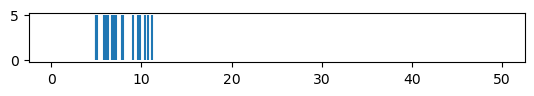

In [5]:
parameter = 'immobility'

fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for obj in objects:
    try:
        plt.vlines(obj.session_df.loc[parameter, 'mean_x_position'], 0, 5)
    except:
        continue
plt.show()

35


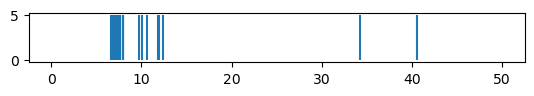

In [8]:
plt.close()
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.plot([0, 50, 50, 0, 0], [5, 5, 0, 0, 5], alpha=0)
for bout in objects[0].immobility_bouts.events:
    plt.vlines(bout.dict['x_position'], 0, 5, alpha=1)
print(len(objects[0].immobility_bouts.events))
plt.show()

In [9]:
obj = objects[0]
print('Immobility:', obj.immobility_bouts.df)
print('Freezing:', obj.freezing_bouts.df)
print('GaitDisruption:', obj.gait_disruption_bouts.df)
print('FreezinOfGait:', obj.freezing_of_gait_events.df)
print('Gait:', obj.gait_events.df)


Immobility:     duration  x_position  id  facing_towards_open_end
0   0.266667   12.437605   0                     True
1   0.300000   11.998455   2                     True
2   0.300000    7.997018   2                    False
3   0.300000    7.316712   3                    False
4   0.233333    7.529574   4                    False
5   0.333333    7.637265   3                    False
6   0.233333    7.343877   6                    False
7   0.266667    7.462196   7                    False
8   0.300000    7.065127   4                    False
9   0.333333    7.003615   5                    False
10  0.233333    7.140031  10                    False
11  0.300000    7.201494  11                    False
12  0.233333    7.179827  12                    False
13  0.300000    7.211768  13                    False
14  0.300000    7.171010   6                    False
15  0.233333    7.051555  15                    False
16  0.233333    7.139055  16                    False
17  0.233333    

In [ ]:
for bot in objects:
    fig = plt.figure()
    for corner in ['MazeCornerOpenLeft', 'MazeCornerOpenRight', 'MazeCornerClosedRight', 'MazeCornerClosedLeft']:
        plt.scatter(bot.bodyparts[corner].df['x'], bot.bodyparts[corner].df['y'], alpha = bot.bodyparts[corner].df['likelihood'])
    plt.scatter(bot.bodyparts['Snout'].df['x'], bot.bodyparts['Snout'].df['y'], alpha = bot.bodyparts['Snout'].df['likelihood'])
    plt.show()